In [1]:
import tensorflow as tf
from meta import Meta
%pylab inline
from matplotlib.patches import Rectangle

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = 'data/test.tfrecords'
filename_queue = tf.train.string_input_producer([filename], num_epochs=None)

In [3]:
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(
  serialized_example,
  features={
                'image': tf.FixedLenFeature([], tf.string),
                'length': tf.FixedLenFeature([], tf.int64),
                'digits': tf.FixedLenFeature([4], tf.int64),
                'letters': tf.FixedLenFeature([5], tf.int64)
            })

In [4]:
image = tf.decode_raw(features['image'], tf.uint8)
image = tf.reshape(image, [54, 216, 3])
length = features['length']
digits = features['digits']
letters = features['letters']

In [5]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

length: 9, digits: 6,7,25,14,3,7,0,15,21


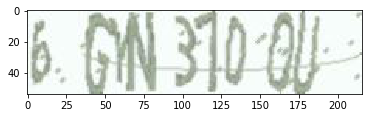

In [6]:
(image_val, length_val, digits_val, letters_val) = sess.run([image, length, digits, letters])

print 'length: %d, digits: %d,%d,%d,%d,%d,%d,%d,%d,%d' % (
    length_val, digits_val[0], letters_val[0], letters_val[1], letters_val[2], digits_val[1], digits_val[2], digits_val[3], letters_val[3], letters_val[4])

imshow(image_val)

In [12]:
meta = Meta()
meta.load('data/meta.json')
print 'num_train_examples: %d' % meta.num_train_examples
print 'num_val_examples: %d' % meta.num_val_examples
print 'num_test_examples: %d' % meta.num_test_examples

num_train_examples: 1011
num_val_examples: 89
num_test_examples: 100


In [8]:
coord.request_stop()
coord.join(threads)
sess.close()